# Class Exercise 1 : Data Profiling and Cleaning

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Vis  ualization

In [1]:
# Basic Libraries

import numpy as np
import pandas as pd

import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

## Problem 1 : Data Preparation

Dataset from Kaggle : The **"House Prices"** competition     
Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

The dataset is split as train and test and we are using`train.csv`; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [2]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You may get information about the data types using `dtypes` for the dataframe houseData

### Common pandas dtypes

#### Numeric Types:These are used for storing numbers.

int64: Used for integers (whole numbers). The 64 indicates the number of bits used for storage, allowing for a large range of values.

float64: Used for floating-point numbers (numbers with decimal points).

#### Text/Categorical Types:These are used for non-numeric data, such as strings and fixed-set values.

object: The most flexible type, often used for columns containing a mix of different Python objects, most commonly strings (text). If a column contains a mix of data types, pandas will typically default to object.

#### Time-Based Types:These are specifically for handling dates and times.

datetime64[ns]: Used for specific moments in time (date and time). The [ns] indicates nanosecond precision.

timedelta[ns]: Used for the difference between two datetime objects (a duration).

#### Boolean Type
bool: Used for True/False values.


In [3]:
houseData.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

## --------------------------------------------------------------------------------------

You may also get more information about the dataset using `info()`.

It prints a comprehensive description of the DataFrame, including:

1. The number of entries (rows).

2. The total number of columns.

3. A list of all columns, showing the number of non-null values and the data type (Dtype) for each one.

4. The overall Dtypes used in the DataFrame.

6. The estimated memory usage of the DataFrame.

In [4]:
houseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Note that there are 35 `int64` , 43 objects and 3 `float64` variables in the dataset.  How did i get this? we can use value_counts     


In [5]:
#may be i can remove this and ask in between 
datatype_counts = houseData.dtypes.value_counts()
print(datatype_counts)


object     43
int64      35
float64     3
Name: count, dtype: int64


Extract the `int64` and 'float64' variables by filtering the variables using their `dtypes`.

In [6]:
houseDataObj = houseData.select_dtypes(include=['object'])
houseDataNum = houseData.select_dtypes(include=['int64','float64'])


#### 1. Checking for duplicates

In [9]:
#checking if any duplicates
houseDataNum.duplicated().sum()

0

#### 2. Checking if any null/na

In [18]:
#checking if any null
houseDataNum.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

#### Three valriables GarageYrBlt, MasVnrArea, LotFrontage has NA, NAN or NULL values. Hence that need to be fixed

#### Q1. Lets first concentrate on GarageYrBlt? What do we interpret here. How should we fill the missing values?

In [14]:
#created a df with just missing garage values (hence 81 rows)
missing_yr_garage_df = houseData[houseData['GarageYrBlt'].isnull()]
print(missing_yr_garage_df)


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
48      49         190       RM         33.0     4456   Pave   NaN      Reg   
78      79          90       RL         72.0    10778   Pave   NaN      Reg   
88      89          50  C (all)        105.0     8470   Pave   NaN      IR1   
89      90          20       RL         60.0     8070   Pave   NaN      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1349  1350          70       RM         50.0     5250   Pave  Pave      Reg   
1407  1408          20       RL          NaN     8780   Pave   NaN      IR1   
1449  1450         180       RM         21.0     1533   Pave   NaN      Reg   
1450  1451          90       RL         60.0     9000   Pave   NaN      Reg   
1453  1454          20       RL         90.0    17217   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [ ]:
print(missing_yr_garage_df)

#### By displaying the rows where GarageYrBlt is missing alongside other garage-related features (GarageCars , GarageArea and GarageType), we can confirm the hypothesis that the missing year implies the absence of a garage.

#### If GarageCars and GarageArea are also zero or null in those same rows, it strongly suggests the house simply doesn't have a garage. We can double check that with GarageType and if that is also NAN, then definitly no garage

In [15]:
# Display only the relevant columns for inspection
columns_to_inspect = ['GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageType', 'Id']
print(missing_yr_garage_df[columns_to_inspect])

      GarageYrBlt  GarageCars  GarageArea GarageType    Id
39            NaN           0           0        NaN    40
48            NaN           0           0        NaN    49
78            NaN           0           0        NaN    79
88            NaN           0           0        NaN    89
89            NaN           0           0        NaN    90
...           ...         ...         ...        ...   ...
1349          NaN           0           0        NaN  1350
1407          NaN           0           0        NaN  1408
1449          NaN           0           0        NaN  1450
1450          NaN           0           0        NaN  1451
1453          NaN           0           0        NaN  1454

[81 rows x 5 columns]


In [16]:
# --- 3. Interpretation and Conclusion ---

if not missing_yr_garage_df.empty:
    # Check if all related garage features are also zero/null for these rows
    all_zero_or_nan_cars = (missing_yr_garage_df['GarageCars'] == 0).all() or missing_yr_garage_df['GarageCars'].isna().all()
    all_zero_or_nan_area = (missing_yr_garage_df['GarageArea'] == 0).all() or missing_yr_garage_df['GarageArea'].isna().all()
    nan_Type = (missing_yr_garage_df['GarageType'].isna().all())
    if all_zero_or_nan_cars and all_zero_or_nan_area and nan_Type:
        print("Observation: For all missing 'GarageYrBlt' rows, 'GarageCars' and 'GarageArea' are 0.0, along with 'GargeType' as Nan")
        print("Conclusion: This confirms the missing year is highly likely a proxy for 'No Garage'.")
    else:
        print("Observation: 'GarageCars' or 'GarageArea' is NOT zero for all missing 'GarageYrBlt' rows or  'GargeType' has a value")
        print("Conclusion: This suggests a genuine missing data issue, not just the absence of a garage.")
else:
    print("No missing values found for 'GarageYrBlt' in the sample data.")

Observation: For all missing 'GarageYrBlt' rows, 'GarageCars' and 'GarageArea' are 0.0, along with 'GargeType' as Nan
Conclusion: This confirms the missing year is highly likely a proxy for 'No Garage'.


#### Missing GarageYrBlt often means the house does not have a garage. 
##### Therefore, the most accurate method is to fill these 81 missing values with a new, distinct value like "No_Garage" 
##### if we want numerical, then put -1 ( ensuring -1 does not conflict with a real year).
##### one more column is created which has Garage yr blt and the imputed values by the name "GarageYrBlt_Imputed"

In [17]:
houseData_impute = houseData.copy()
# This uses -1.0 as a clear numerical proxy for 'No Garage', which is safer than 0.0.
# we are only filling the values which had na or null with '-1', you can check row 39 , 48 etc
houseData_impute['GarageYrBlt_Imputed'] = houseData_impute['GarageYrBlt'].fillna(-1.0)

print(houseData_impute.head(50))


    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    2          20       RL         80.0     9600   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
3    4          70       RL         60.0     9550   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
5    6          50       RL         85.0    14115   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
7    8          60       RL          NaN    10382   Pave   NaN      IR1   
8    9          50       RM         51.0     6120   Pave   NaN      Reg   
9   10         190       RL         50.0     7420   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   
11  12          60       RL         85.0    11924   Pave   NaN      IR1   
12  13          20       

### Q2. Lets now concentrate on MasVnrArea(area of masonry veneer in square feet). It is also a continuous numerical variable, but with a twist: a value of 0 is common and meaningful (meaning no masonry veneer))? What do we interpret here. Which is the variable hich can help us in fixing the same? How should we fill the missing values?

## ----------------------------------------------------------------------
#### Now lets take MasVnrArea
##### MasVnrArea represents the area of masonry veneer in square feet. It is also a continuous numerical variable, but with a twist: a value of 0 is common and meaningful (meaning no masonry veneer).
##### If the count is very small (only 8) and if we have confirmed the property should have masonry (e.g., MasVnrType is present), using the median is acceptable, as it introduces very little bias due to the low count of missing data. 


## ---------------------------------------------------------------------------------
##### Lets check if MasVnrTYpe is present

###### If MasVnrType is NA (or None) and MasVnrArea is also missing, it strongly suggests the house simply does not have masonry veneer. In this case, you should impute MasVnrArea with 0.

###### If MasVnrType has a value (e.g., 'Brick Face', 'Stone') but MasVnrArea is missing, it suggests a genuine missing data error, and you would likely impute MasVnrArea with the median of its category.

In [19]:
# Check rows where MasVnrArea is missing
missing_mas_area = houseData[houseData['MasVnrArea'].isna()]

# Inspect the corresponding MasVnrType for these rows
print(missing_mas_area[['MasVnrArea', 'MasVnrType']])

      MasVnrArea MasVnrType
234          NaN        NaN
529          NaN        NaN
650          NaN        NaN
936          NaN        NaN
973          NaN        NaN
977          NaN        NaN
1243         NaN        NaN
1278         NaN        NaN


#### MasVnrType is NA (or None) and MasVnrArea is also missing, it strongly suggests the house simply does not have masonry veneer. 
#### In this case, you should impute MasVnrArea with 0.



In [21]:
# This uses 0 as a clear numerical proxy for 'MasVarArea', 
houseData_impute['MasVnrArea_Imputed'] = houseData_impute['MasVnrArea'].fillna(0.0)
print(houseData_impute.head(50))

#print(houseData_impute.loc[[234,529,650,936,973,977,1243,1278]])

    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    2          20       RL         80.0     9600   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
3    4          70       RL         60.0     9550   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
5    6          50       RL         85.0    14115   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
7    8          60       RL          NaN    10382   Pave   NaN      IR1   
8    9          50       RM         51.0     6120   Pave   NaN      Reg   
9   10         190       RL         50.0     7420   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   
11  12          60       RL         85.0    11924   Pave   NaN      IR1   
12  13          20       

### Q3 Lets now concentrate on LotFrontage? It is the Linear feet of street connected to property. Which is the variable hich can help us in fixing the same? How should we fill the missing values?

###  how about lot frontage
#### For a typical rectangular or square lot, the LotArea is directly correlated with the LotFrontage. While the relationship isn't a perfect linear one (due to irregular lot shapes), larger lots generally require and possess greater street frontage.
#### Another one is Neighbourhood.  Most cities organize residential areas into specific zoning districts (Neighborhood). These zones often have strict regulations regarding minimum and maximum lot dimensions, including the required LotFrontage (the width facing the street). Properties within the same neighborhood or subdivision were often developed around the same time and follow similar building codes and design standards. This means that a house missing its LotFrontage is highly likely to have a frontage similar to the median frontage of its immediate neighbors.


In [22]:
print(houseData[['LotFrontage', 'LotArea', 'Neighborhood']].head(30))
print("\n" + "="*50 + "\n")

    LotFrontage  LotArea Neighborhood
0          65.0     8450      CollgCr
1          80.0     9600      Veenker
2          68.0    11250      CollgCr
3          60.0     9550      Crawfor
4          84.0    14260      NoRidge
5          85.0    14115      Mitchel
6          75.0    10084      Somerst
7           NaN    10382       NWAmes
8          51.0     6120      OldTown
9          50.0     7420      BrkSide
10         70.0    11200       Sawyer
11         85.0    11924      NridgHt
12          NaN    12968       Sawyer
13         91.0    10652      CollgCr
14          NaN    10920        NAmes
15         51.0     6120      BrkSide
16          NaN    11241        NAmes
17         72.0    10791       Sawyer
18         66.0    13695      SawyerW
19         70.0     7560        NAmes
20        101.0    14215      NridgHt
21         57.0     7449       IDOTRR
22         75.0     9742      CollgCr
23         44.0     4224      MeadowV
24          NaN     8246       Sawyer
25        11

#### The median imputation method shown in your Canvas file is designed for single-variable imputation based on a categorical group: Neighbourhood
#### This step groups the data into discrete buckets (e.g., all houses in 'CollgCr' go into one bucket)
#### x.fillna(x.median()): This calculates the single median value for each bucket (e.g., the median LotFrontage for all 'CollgCr' houses) and applies it to the missing rows within that bucket.

#### The limitation is: This method only allows you to group by categorical variables (Neighborhood). It does not allow you to simultaneously condition the median on a continuous variable like LotArea.

In [24]:
# --- 2. Simple Median Imputation (Grouped by Neighborhood) ---
# This is often the first and most effective method for LotFrontage.

# 2a. Calculate the median LotFrontage for each Neighborhood
median_by_neighborhood = houseData_impute.groupby('Neighborhood')['LotFrontage'].median()
print("Neighborhood Medians:\n", median_by_neighborhood)

# 2b. Apply the calculated median to fill the NaNs in the original column
houseData_impute['LotFrontage_Grouped_Median'] = houseData.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Create a DataFrame containing only the rows that were originally missing LotFrontage
missing_lotfrontage_df = houseData_impute[houseData['LotFrontage'].isna()].copy() 
comparison_cols = ['Id', 'Neighborhood', 'LotFrontage', 'LotFrontage_Grouped_Median']
print(missing_lotfrontage_df[comparison_cols].head(30)) 
print("\n" + "-"*50 + "\n")


Neighborhood Medians:
 Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    52.0
ClearCr    80.0
CollgCr    70.0
Crawfor    74.0
Edwards    65.5
Gilbert    65.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    73.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    91.0
NridgHt    88.5
OldTown    60.0
SWISU      60.0
Sawyer     71.0
SawyerW    66.5
Somerst    73.5
StoneBr    61.5
Timber     85.0
Veenker    68.0
Name: LotFrontage, dtype: float64
      Id Neighborhood  LotFrontage  LotFrontage_Grouped_Median
7      8       NWAmes          NaN                        80.0
12    13       Sawyer          NaN                        71.0
14    15        NAmes          NaN                        73.0
16    17        NAmes          NaN                        73.0
24    25       Sawyer          NaN                        71.0
31    32       Sawyer          NaN                        71.0
42    43      SawyerW          NaN                        66.5
43    44      CollgCr     

#### Why median and not mean

### A different approach (try by yourself)
#### if you wish to use 'lot area', You can convert the continuous LotArea into a categorical variable by grouping it into bins (e.g., 'Small Lot', 'Medium Lot', 'Large Lot'). You could then group by both Neighborhood and the new LotArea_Bin.

### ------------------------------------------------------------------------------------------------------------
### 3. How many zero values

In [25]:
print((houseDataNum == 0).sum())

Id                  0
MSSubClass          0
LotFrontage         0
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea        861
BsmtFinSF1        467
BsmtFinSF2       1293
BsmtUnfSF         118
TotalBsmtSF        37
1stFlrSF            0
2ndFlrSF          829
LowQualFinSF     1434
GrLivArea           0
BsmtFullBath      856
BsmtHalfBath     1378
FullBath            9
HalfBath          913
BedroomAbvGr        6
KitchenAbvGr        1
TotRmsAbvGrd        0
Fireplaces        690
GarageYrBlt         0
GarageCars         81
GarageArea         81
WoodDeckSF        761
OpenPorchSF       656
EnclosedPorch    1252
3SsnPorch        1436
ScreenPorch      1344
PoolArea         1453
MiscVal          1408
MoSold              0
YrSold              0
SalePrice           0
dtype: int64


#### Summary of the zero values
1. BsmtFinSF1	(467)	The house has no finished basement area of type 1 (the higher quality finished area).
2. BsmtFinSF2	(1293)	The house has no finished basement area of type 2 (the lower quality finished area).
3. 2ndFlrSF	(829)	The house has no second floor (it is a single-story home).
4. LowQualFinSF	(1434)	The house has no low-quality finished square footage.
5. Fireplaces	(690)	The house has zero fireplaces.
6. GarageCars / GarageArea	(81)	The house has no garage (or the garage has zero car capacity/area).
7. PoolArea	(1453)	The house has no pool.
8. MiscVal	(1408)	The house has no miscellaneous value additions (e.g., shed, tennis court).

#### All of these are agreeable, if lotarea, overallqual, yrbulit has zeros, that is more of a concern

### 4. checking for outliers for "SalePrice"

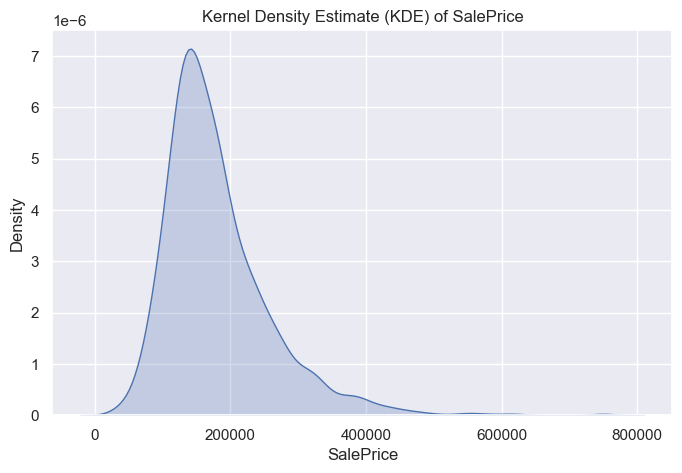

In [26]:
plt.figure(figsize=(8, 5))
sb.kdeplot(houseData['SalePrice'], fill=True)
plt.title("Kernel Density Estimate (KDE) of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Density")
plt.show()

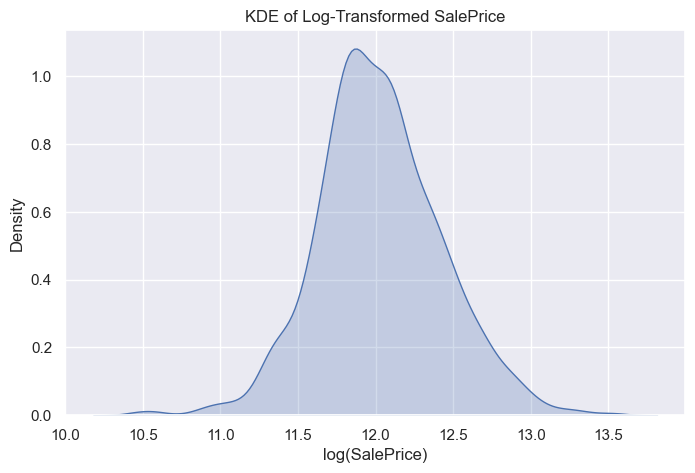

In [28]:
houseData['Log_SalePrice'] = np.log(houseData['SalePrice'])
plt.figure(figsize=(8, 5))
sb.kdeplot(houseData['Log_SalePrice'], fill=True)
plt.title("KDE of Log-Transformed SalePrice")
plt.xlabel("log(SalePrice)")
plt.ylabel("Density")
plt.show()

In [29]:

    Q1 = houseDataNum['SalePrice'].quantile(0.25)
    Q3 = houseDataNum['SalePrice'].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outlier_data = houseDataNum[(houseDataNum['SalePrice'] < lower_bound) | (houseDataNum['SalePrice'] > upper_bound)]
    
print(lower_bound)
print(upper_bound)
print(outlier_data)

3937.5
340037.5
        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
11      12          60         85.0    11924            9            5   
53      54          20         68.0    50271            9            5   
58      59          60         66.0    13682           10            5   
112    113          60         77.0     9965            7            5   
151    152          20        107.0    13891            8            5   
...    ...         ...          ...      ...          ...          ...   
1268  1269          50          NaN    14100            8            9   
1353  1354          50         56.0    14720            8            5   
1373  1374          20          NaN    11400           10            5   
1388  1389          20         42.0    14892            9            5   
1437  1438          20         96.0    12444            8            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
11         2005      

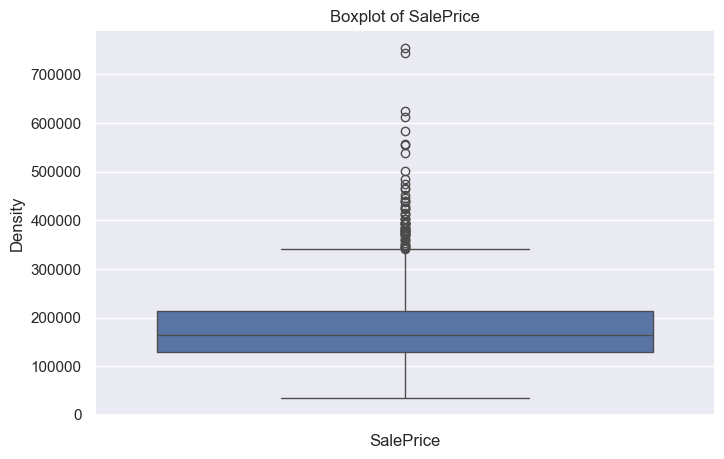

In [30]:
plt.figure(figsize=(8, 5))
sb.boxplot(houseData['SalePrice'], fill=True)
plt.title("Boxplot of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Density")
plt.show()

#### Outlier check can be doen with z score with threshold of 3 for normal distributed items
The formula for the Z-score ($Z$) for a single data point ($x$) is:$$Z = \frac{x - \mu}{\sigma}$$Where:$\mu$ is the mean of the column.$\sigma$ is the standard deviation of the column.
##### Sensitivity to Skewness: If your data is highly skewed (like the SalePrice column, which has a long tail of high values), the mean ($\mu$) and standard deviation ($\sigma$) will be distorted by the extreme outliers themselves. This can lead to the Z-score method failing to detect outliers accurately.
##### Recommendation: For skewed data, the Interquartile Range (IQR) method is generally preferred because it uses the median and quartiles, which are less affected by extreme values.

In [32]:
from scipy import stats

def zscore_outliers(df, column, threshold=3):
    """
    Identifies outliers in a column using the Z-score method.
    
    Args:
        df (pd.DataFrame): The DataFrame to check.
        column (str): The name of the column to analyze.
        threshold (int): The absolute Z-score value beyond which a point is an outlier.
    """
    # 1. Calculate Z-scores for the column
    # stats.zscore standardizes the data to have a mean of 0 and std dev of 1.
    z_scores = np.abs(stats.zscore(df[column]))
    
    # 2. Identify the indices (row numbers) where the Z-score exceeds the threshold
    outlier_indices = np.where(z_scores > threshold)[0]
    
    # 3. Return the actual outlier rows from the DataFrame
    return df.iloc[outlier_indices]

# Example Usage:
# Assuming your DataFrame is named 'houseDataNum' and you want to check 'SalePrice'
outlier_data_z = zscore_outliers(houseDataNum, 'SalePrice', threshold=3)
print(f"Number of outliers found: {len(outlier_data_z)}")
print("\nOutlier Rows:")
print(outlier_data_z)

Number of outliers found: 22

Outlier Rows:
        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
58      59          60         66.0    13682           10            5   
178    179          20         63.0    17423            9            5   
185    186          75         90.0    22950           10            9   
349    350          60         56.0    20431            9            5   
389    390          60         96.0    12474           10            5   
440    441          20        105.0    15431           10            5   
473    474          20        110.0    14977            8            5   
496    497          20          NaN    12692            8            5   
527    528          60         67.0    14948            9            5   
591    592          60         97.0    13478           10            5   
664    665          20         49.0    20896            8            5   
691    692          60        104.0    21535           10           

#### How to plot whether the data is normal and check skewness

In [34]:
houseData['SalePrice'].skew()

1.8828757597682129

#### This is right skewed and hence need a transformation- Usaually log transofrmation is done..We wills ee transformation in the next week class

#### Find correlation between variables to see which of them are related 
1. The Pearson correlation coefficient is a measure of the linear correlation between two sets of data.
2.  It is the most common way to quantify the relationship between two variables, such as height and weight, or in your case, a feature and house price
3. Interpretation of the Coefficient ($r$) is between +1 to -1, where +1 is stong positive correlation , -1 is strong negative correlation and 0 is no correlation
4. The FormulaThe formula for the Pearson correlation coefficient between two variables, $X$ and $Y$, is:$$r = \frac{\sum_{i=1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^{n}(X_i - \bar{X})^2} \sqrt{\sum_{i=1}^{n}(Y_i - \bar{Y})^2}}$$

In [35]:
houseDataNum.corr()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


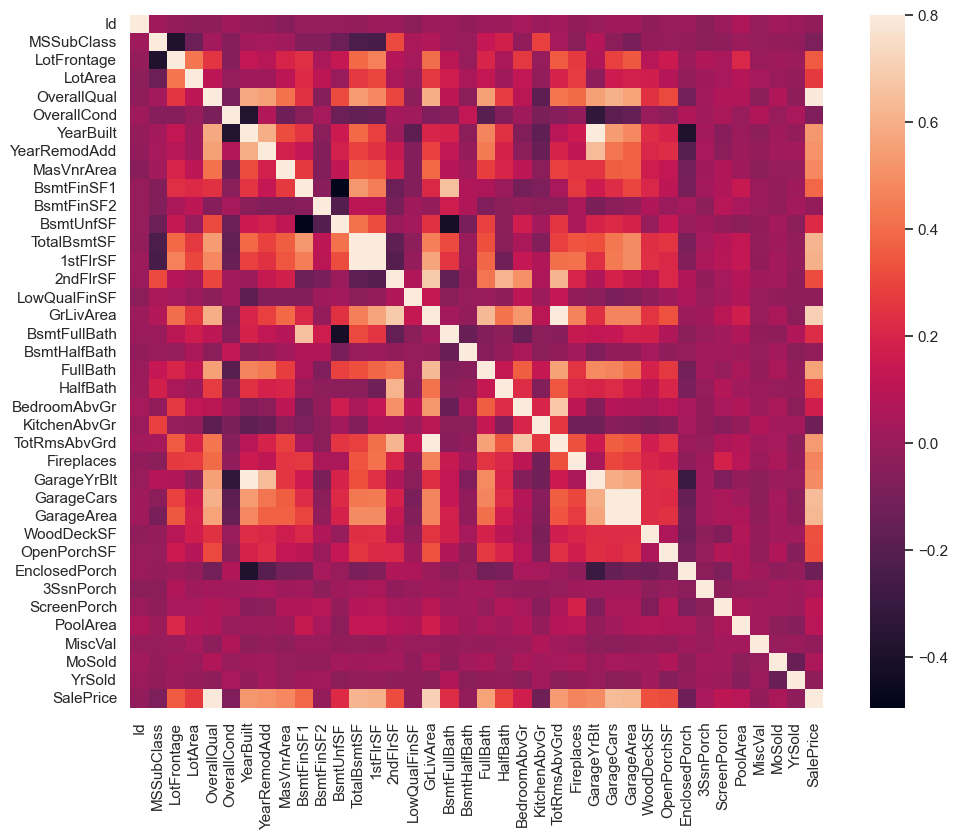

In [36]:
#correlation matrix for imputed

corrmat = houseDataNum.corr()
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(corrmat, vmax=.8, square=True);

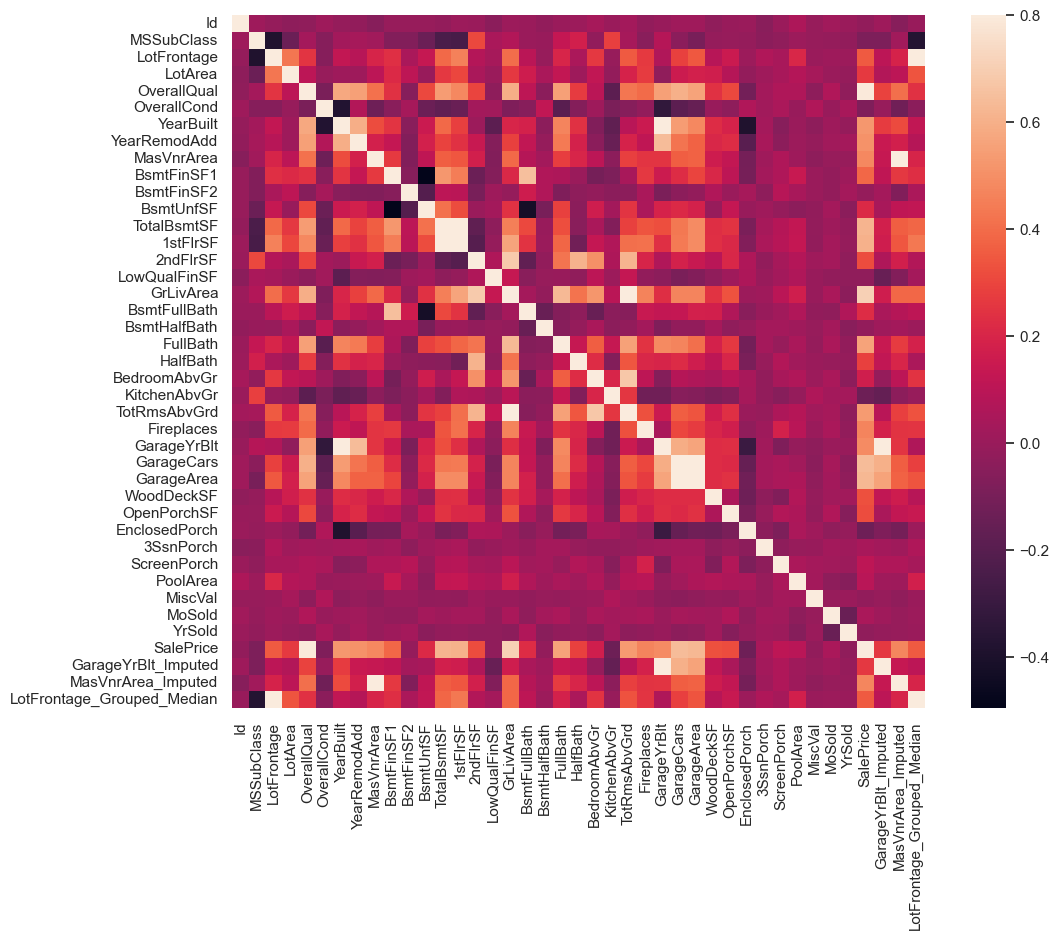

In [38]:
#correlation matrix for imputed
houseData_impute_num=houseData_impute.select_dtypes(include=['int64','float64'])
corrmat1 = houseData_impute_num.corr()
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(corrmat1, vmax=.8, square=True);

In [37]:
#which values are highly correlated to saleprice incase we need to use this for prediction
# 1. Select the 'SalePrice' column from the matrix
sale_price_corr = corrmat['SalePrice']

# 2. Sort by the absolute value to find the strongest relationships
top_10_features = abs(sale_price_corr).sort_values(ascending=False).head(10) 
# Use .head(6) to include 'SalePrice' itself (which will be 1.0) and the top 5 predictors

print(top_10_features)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


But it can be noted from the heatmap that TotalBSMTSF and IstFlrSF along with Garagearea and Garage Car has high multicolleneiarity (highest absolute $r$, excluding the diagonal).) Multicollinearity is generally not considered a good feature in a regression model because it introduces instability and redundancy, making the model's coefficients unreliable and difficult to interpret.

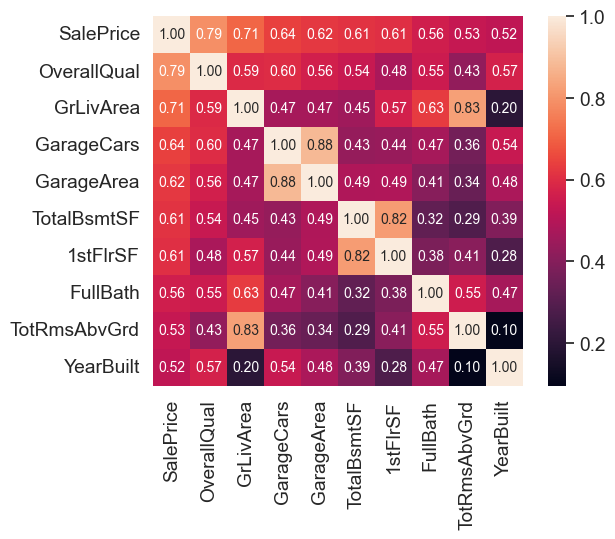

In [40]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(houseDataNum[cols].values.T)
sb.set(font_scale=1.25)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

1. 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!
2. 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. Note the number of cars that fit into the garage is a consequence of the garage area. The car capacity of the garage is almost perfectly proportional to its physical area. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation is higher).
3. 'TotalBsmtSF' and '1stFloor' also seem to be pairs. For single-story homes, the basement square footage is often the same as the first-floor square footage. We can keep 'TotalBsmtSF'.
4. 'TotRmsAbvGrd' and 'GrLivArea', are pairs again.The above-ground living area is directly related to the total number of rooms above ground.
5. 'YearBuilt' is slightly correlated with 'SalePrice'. Honestly, it seems odd as it should be negatively correlated. Need more analysis on this

In [ ]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

# Generate the report
profile = ProfileReport(
    houseDataNum, 
    title="Kaggle House Data Profile", 
    explorative=True
)

# Display the report inline
profile.to_notebook_iframe()

# Alternatively, save to an HTML file
# profile.to_file("house_data_report.html")

In [ ]:
profile.to_file("house_data_report.html")

#### We are seeing some numerical as categorical values...Which ones are they...why are they categorical? Lets see Categorical One-Hot Encoding in the next session